In [1]:
import tensorflow as tf
import keras.backend as K
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorboard as tb

In [2]:
#Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
#Prototype
model = models.Sequential()

#CNN with 3 hidden layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

#Classification
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
history = model.fit(train_images, train_labels, epochs=100, batch_size=32, shuffle=True,
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
model.evaluate(test_images,  test_labels, verbose=1)

In [ ]:
# Prototype performance
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.title.set_text('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.title.set_text('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='upper left')
plt.savefig('prototype.png')
plt.show()

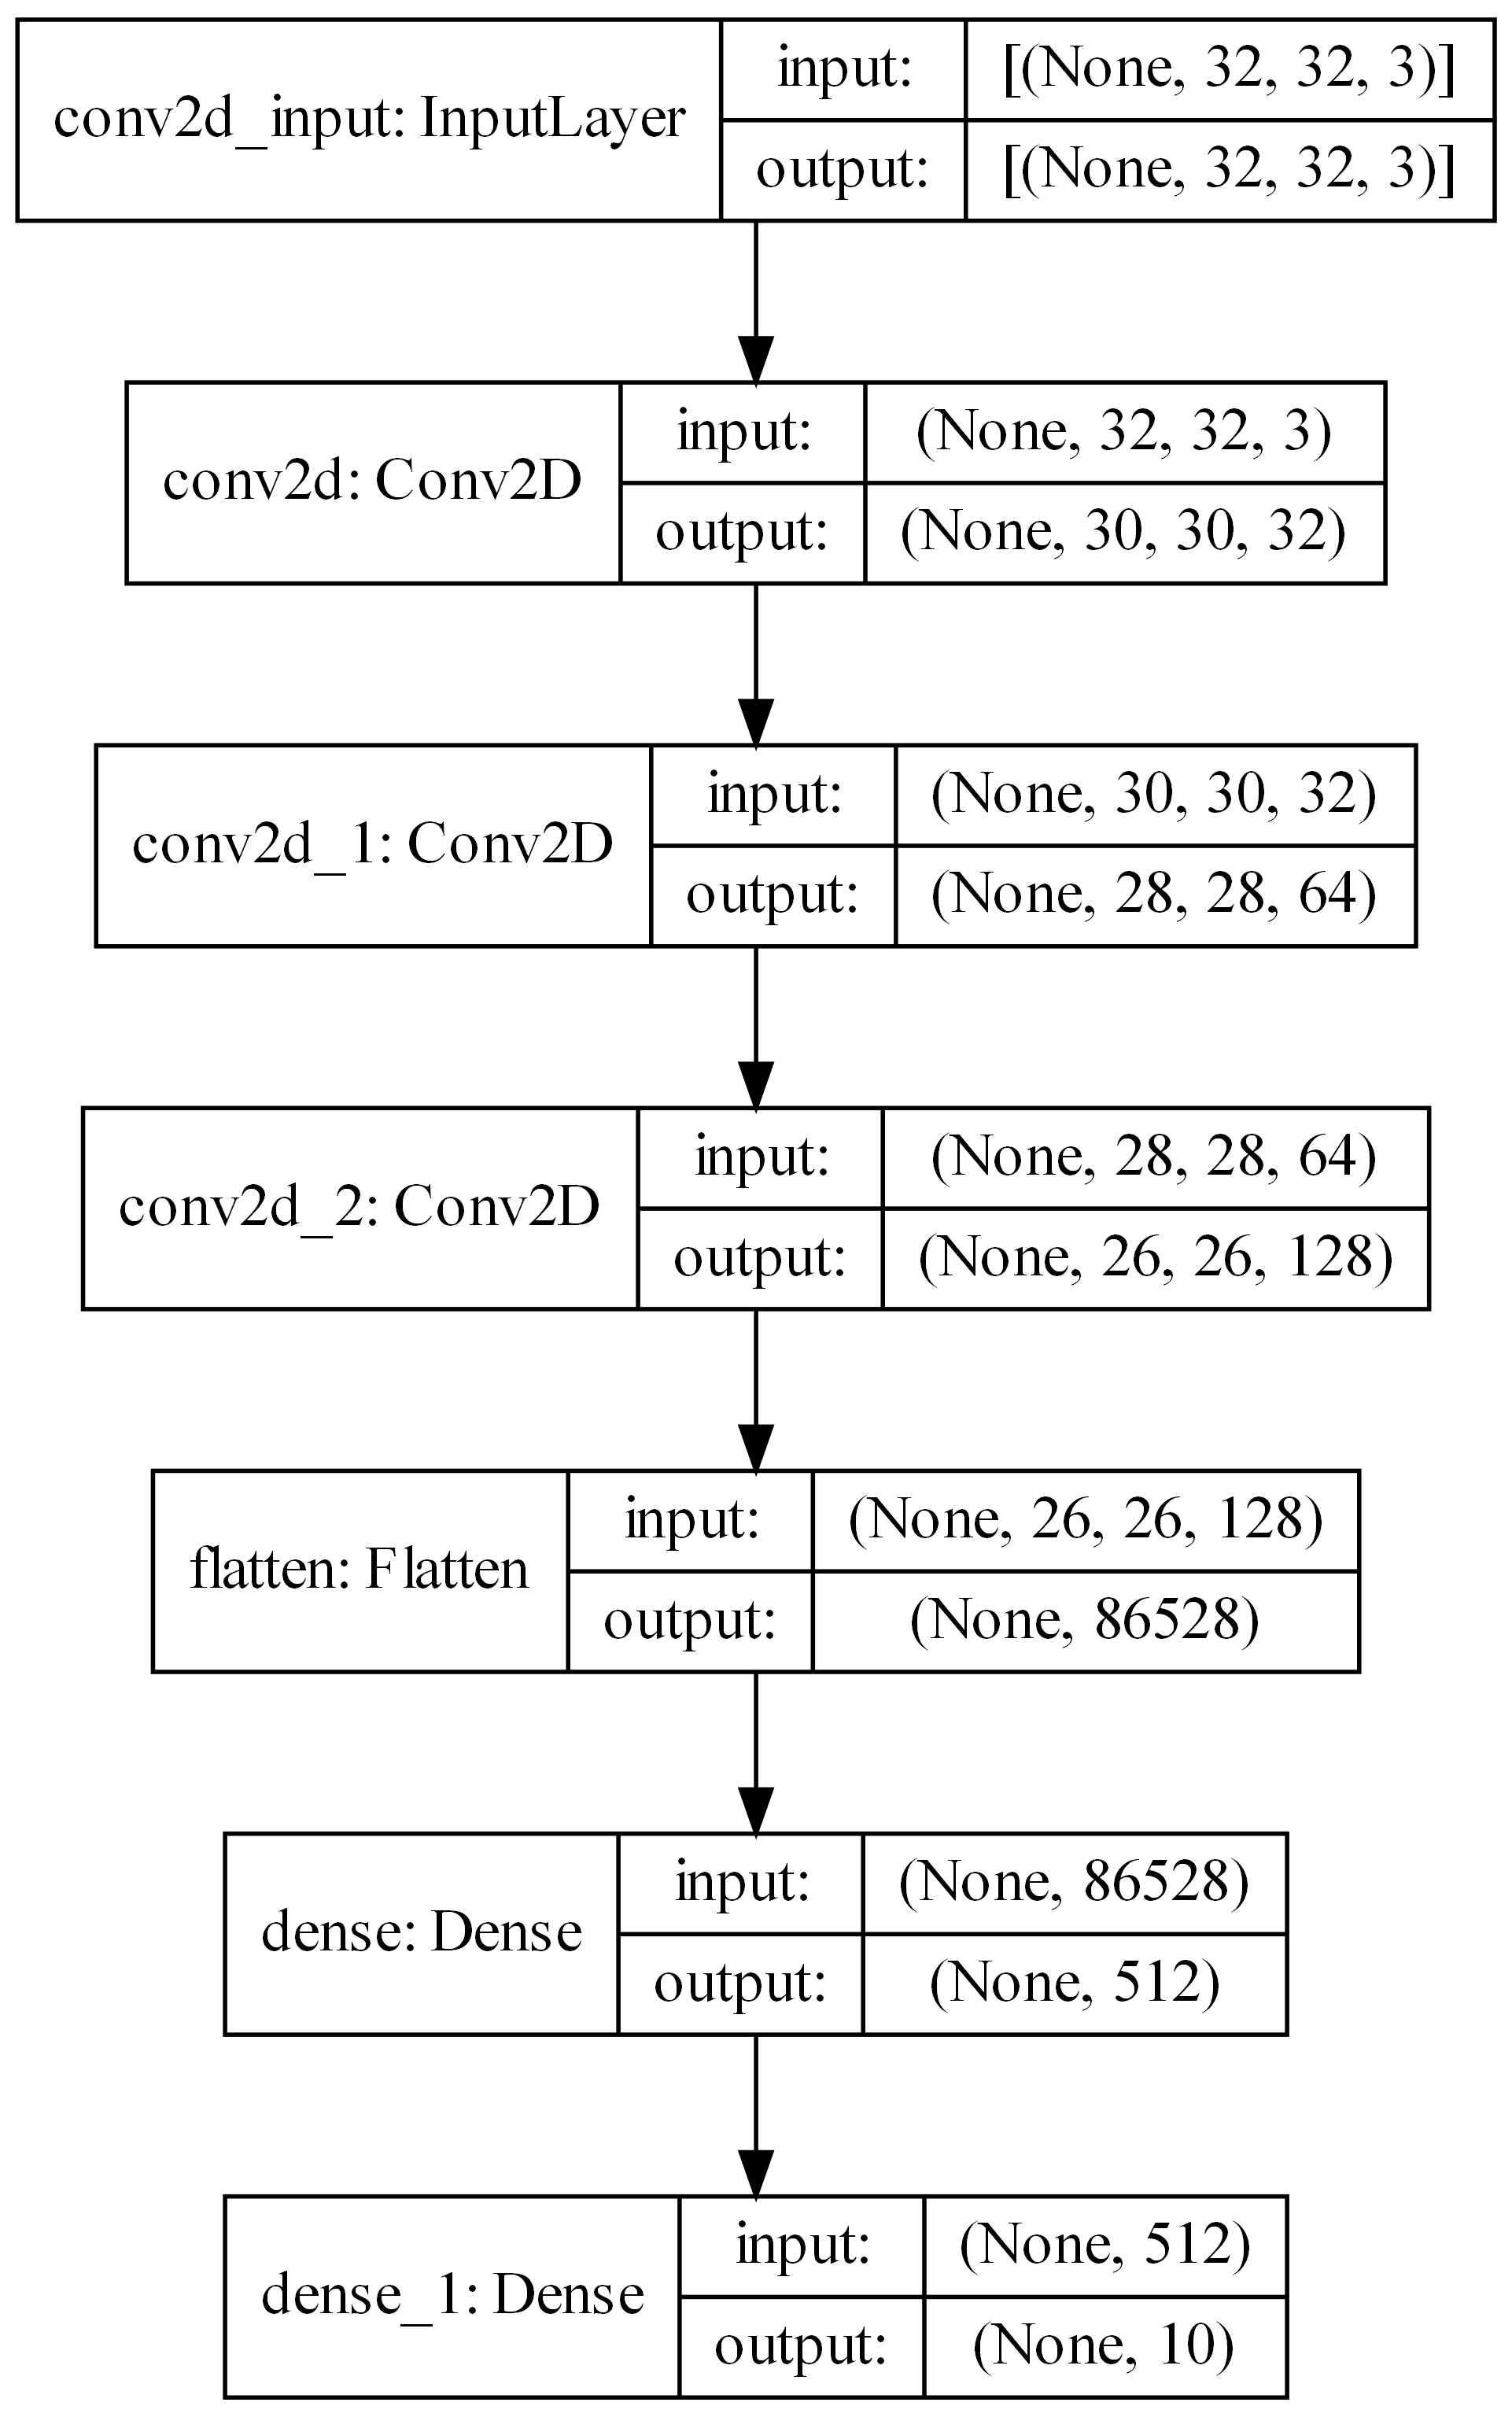

In [5]:
tf.keras.utils.plot_model(model, to_file='model.png',show_shapes=True, dpi=400)

In [14]:
#Test2 AveragePooling2D
model2 = models.Sequential()

#CNN with 3 hidden layers
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.AveragePooling2D(2,2))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.AveragePooling2D(2,2))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.AveragePooling2D(2,2))

#Classification
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=100, batch_size=32, shuffle=True,
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
model2.evaluate(test_images,  test_labels, verbose=1)

Epoch 1/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7553 - accuracy: 0.3488 - val_loss: 1.3101 - val_accuracy: 0.5279
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2409 - accuracy: 0.5578 - val_loss: 1.1653 - val_accuracy: 0.5862
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0603 - accuracy: 0.6239 - val_loss: 1.0088 - val_accuracy: 0.6420
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9291 - accuracy: 0.6740 - val_loss: 0.9669 - val_accuracy: 0.6617
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8190 - accuracy: 0.7105 - val_loss: 0.9089 - val_accuracy: 0.6826
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7438 - accuracy: 0.7382 - val_loss: 0.8587 - val_accuracy: 0.6964
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6749 - accuracy: 0.7622 - val_loss: 0.8424 - val_ac

[3.7425122261047363, 0.7202000021934509]

In [9]:
#Test3 MaxPooling
model3 = models.Sequential()

#CNN with 3 hidden layers
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D(2,2))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D(2,2))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D(2,2))

#Classification
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))
model3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history3 = model3.fit(train_images, train_labels, epochs=100, batch_size=32, shuffle=True, 
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
model3.evaluate(test_images,  test_labels, verbose=1)

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6985 - accuracy: 0.3745 - val_loss: 1.2755 - val_accuracy: 0.5467
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1131 - accuracy: 0.6060 - val_loss: 0.9843 - val_accuracy: 0.6506
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9305 - accuracy: 0.6731 - val_loss: 0.9617 - val_accuracy: 0.6642
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7997 - accuracy: 0.7207 - val_loss: 0.8902 - val_accuracy: 0.6950
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7044 - accuracy: 0.7545 - val_loss: 0.8772 - val_accuracy: 0.7009
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6283 - accuracy: 0.7786 - val_loss: 0.8954 - val_accuracy: 0.7052
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5536 - accuracy: 0.8047 - val_loss: 0.8984 - val_ac

[5.167872905731201, 0.6935999989509583]

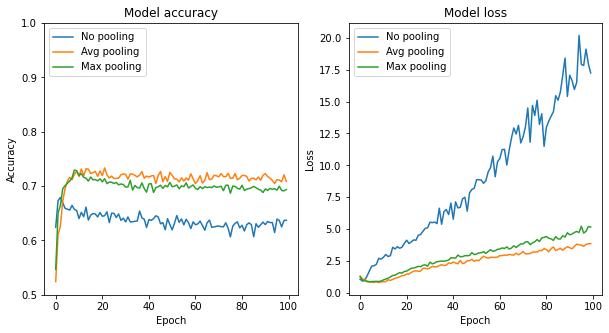

In [18]:
# Compare pooling 
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.plot(history.history['val_accuracy']) #no 
ax1.plot(history2.history['val_accuracy']) #avg
ax1.plot(history3.history['val_accuracy']) #max
ax1.title.set_text('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylim([0.5,1])
ax1.legend(['No pooling', 'Avg pooling', 'Max pooling'], loc='upper left')

ax2.plot(history.history['val_loss'])
ax2.plot(history2.history['val_loss']) #avg
ax2.plot(history3.history['val_loss']) #max
ax2.title.set_text('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['No pooling', 'Avg pooling', 'Max pooling'], loc='upper left')


plt.savefig('pooling.png')
plt.show()

In [11]:
#Test4 RMSprop
model4 = models.Sequential()

#CNN with 3 hidden layers
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model4.add(layers.AveragePooling2D(2,2))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.AveragePooling2D(2,2))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.AveragePooling2D(2,2))

#Classification
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))
model4.compile(optimizer='RMSprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history4 = model4.fit(train_images, train_labels, epochs=100, batch_size=32, shuffle=True,
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
model4.evaluate(test_images,  test_labels, verbose=1)

Epoch 1/100
1563/1563 [==============================] - 11s 6ms/step - loss: 1.7935 - accuracy: 0.3400 - val_loss: 1.3932 - val_accuracy: 0.4931
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2212 - accuracy: 0.5677 - val_loss: 1.1676 - val_accuracy: 0.5844
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0139 - accuracy: 0.6439 - val_loss: 1.0102 - val_accuracy: 0.6469
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8811 - accuracy: 0.6920 - val_loss: 0.9117 - val_accuracy: 0.6874
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8041 - accuracy: 0.7209 - val_loss: 0.9724 - val_accuracy: 0.6644
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7319 - accuracy: 0.7499 - val_loss: 0.8762 - val_accuracy: 0.7021
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6808 - accuracy: 0.7652 - val_loss: 0.8792 - val_a

[1.5200046300888062, 0.6945000290870667]

In [12]:
#Test5 Adadelta
model5 = models.Sequential()

#CNN with 3 hidden layers
model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model5.add(layers.AveragePooling2D(2,2))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(layers.AveragePooling2D(2,2))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.AveragePooling2D(2,2))

#Classification
model5.add(layers.Flatten())
model5.add(layers.Dense(512, activation='relu'))
model5.add(layers.Dense(10, activation='softmax'))
model5.compile(optimizer='Adadelta', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history5 = model5.fit(train_images, train_labels, epochs=100, batch_size=32, shuffle=True,
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
model5.evaluate(test_images,  test_labels, verbose=1)

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3039 - accuracy: 0.1066 - val_loss: 2.2985 - val_accuracy: 0.1306
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2969 - accuracy: 0.1285 - val_loss: 2.2927 - val_accuracy: 0.1148
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2911 - accuracy: 0.1143 - val_loss: 2.2872 - val_accuracy: 0.1094
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2861 - accuracy: 0.1106 - val_loss: 2.2813 - val_accuracy: 0.1099
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2800 - accuracy: 0.1118 - val_loss: 2.2746 - val_accuracy: 0.1170
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2723 - accuracy: 0.1217 - val_loss: 2.2665 - val_accuracy: 0.1284
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2643 - accuracy: 0.1344 - val_loss: 2.2568 - val_ac

[1.730507254600525, 0.38179999589920044]

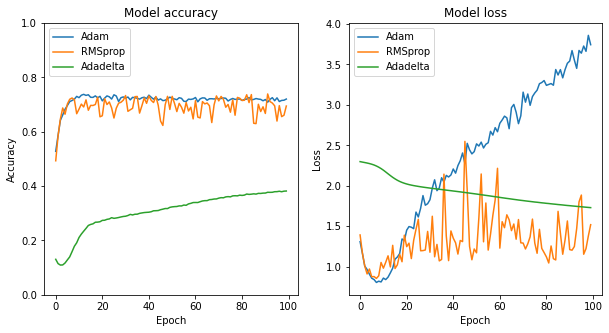

In [48]:
# Compare pooling 
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.plot(history2.history['val_accuracy']) #adam 
ax1.plot(history4.history['val_accuracy']) #RMSprop
ax1.plot(history5.history['val_accuracy']) #Adadelta
ax1.title.set_text('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylim([0,1])
ax1.legend(['Adam', 'RMSprop', 'Adadelta'], loc='upper left')

ax2.plot(history2.history['val_loss']) #adam 
ax2.plot(history4.history['val_loss']) #RMSprop
ax2.plot(history5.history['val_loss']) #Adadelta
ax2.title.set_text('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Adam', 'RMSprop', 'Adadelta'], loc='upper left')


plt.savefig('optimizer.png')
plt.show()

In [18]:
#Test6 BatchNormalization
model6 = models.Sequential()

#CNN with 3 hidden layers
model6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model6.add(layers.BatchNormalization())
model6.add(layers.AveragePooling2D(2,2))
model6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(layers.BatchNormalization())
model6.add(layers.AveragePooling2D(2,2))
model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.BatchNormalization())
model6.add(layers.AveragePooling2D(2,2))

#Classification
model6.add(layers.Flatten())
model6.add(layers.Dense(512, activation='relu'))
model6.add(layers.Dense(10, activation='softmax'))
model6.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history6 = model6.fit(train_images, train_labels, epochs=100, batch_size=32, shuffle=True,
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
model6.evaluate(test_images,  test_labels, verbose=1)

Epoch 1/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4989 - accuracy: 0.4689 - val_loss: 1.1793 - val_accuracy: 0.5914
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9054 - accuracy: 0.6828 - val_loss: 1.4309 - val_accuracy: 0.5358
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7120 - accuracy: 0.7490 - val_loss: 0.9677 - val_accuracy: 0.6606
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5705 - accuracy: 0.7993 - val_loss: 0.8846 - val_accuracy: 0.7036
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4598 - accuracy: 0.8373 - val_loss: 0.8480 - val_accuracy: 0.7250
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3630 - accuracy: 0.8719 - val_loss: 0.8809 - val_accuracy: 0.7256
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2827 - accuracy: 0.9023 - val_loss: 0.9154 - val_ac

[2.487590789794922, 0.7405999898910522]

In [20]:
#Test7 BatchNormalization+dropout
model7 = models.Sequential()

#CNN with 3 hidden layers
model7.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model7.add(layers.BatchNormalization())
model7.add(layers.AveragePooling2D(2,2))
model7.add(layers.Conv2D(64, (3, 3), activation='relu'))
model7.add(layers.BatchNormalization())
model7.add(layers.AveragePooling2D(2,2))
model7.add(layers.Conv2D(128, (3, 3), activation='relu'))
model7.add(layers.BatchNormalization())
model7.add(layers.AveragePooling2D(2,2))

#Classification
model7.add(layers.Flatten())
model7.add(layers.Dropout(0.3))
model7.add(layers.Dense(512, activation='relu'))
model7.add(layers.Dense(10, activation='softmax'))
model7.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history7 = model7.fit(train_images, train_labels, epochs=100, batch_size=32, shuffle=True,
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
model7.evaluate(test_images,  test_labels, verbose=1)

Epoch 1/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5810 - accuracy: 0.4437 - val_loss: 1.2298 - val_accuracy: 0.5590
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0236 - accuracy: 0.6383 - val_loss: 1.1863 - val_accuracy: 0.5888
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8603 - accuracy: 0.6998 - val_loss: 0.8550 - val_accuracy: 0.6992
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7502 - accuracy: 0.7348 - val_loss: 0.9433 - val_accuracy: 0.6776
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6736 - accuracy: 0.7629 - val_loss: 0.8101 - val_accuracy: 0.7227
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6035 - accuracy: 0.7882 - val_loss: 0.7778 - val_accuracy: 0.7330
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5473 - accuracy: 0.8102 - val_loss: 0.7270 - val_a

[0.9642335772514343, 0.7839999794960022]

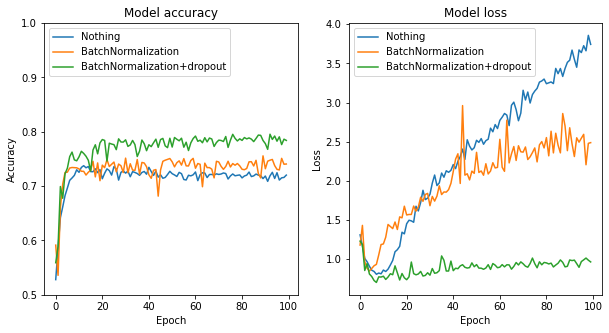

In [47]:
# Compare BatchNormalization+dropout
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.plot(history2.history['val_accuracy']) #adam only
ax1.plot(history6.history['val_accuracy']) #BatchNormalization
ax1.plot(history7.history['val_accuracy']) #BatchNormalization+dropout
ax1.title.set_text('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylim([0.5,1])
ax1.legend(['Nothing', 'BatchNormalization', 'BatchNormalization+dropout'], loc='upper left')

ax2.plot(history2.history['val_loss']) #adam 
ax2.plot(history6.history['val_loss']) #RMSprop
ax2.plot(history7.history['val_loss']) #Adadelta
ax2.title.set_text('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Nothing', 'BatchNormalization', 'BatchNormalization+dropout'], loc='upper left')


plt.savefig('Addition_improve.png')
plt.show()

In [33]:
#Test8 lr=0.01


model8 = models.Sequential()

#CNN with 3 hidden layers
model8.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model8.add(layers.BatchNormalization())
model8.add(layers.AveragePooling2D(2,2))
model8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model8.add(layers.BatchNormalization())
model8.add(layers.AveragePooling2D(2,2))
model8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model8.add(layers.BatchNormalization())
model8.add(layers.AveragePooling2D(2,2))

#Classification
model8.add(layers.Flatten())
model8.add(layers.Dropout(0.3))
model8.add(layers.Dense(512, activation='relu'))
model8.add(layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model8.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history8 = model8.fit(train_images, train_labels, epochs=100, batch_size=32, shuffle=True,
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
model8.evaluate(test_images,  test_labels, verbose=1)

Epoch 1/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.1048 - accuracy: 0.3402 - val_loss: 1.6460 - val_accuracy: 0.4364
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3187 - accuracy: 0.5286 - val_loss: 1.2054 - val_accuracy: 0.5745
Epoch 3/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1682 - accuracy: 0.5966 - val_loss: 1.1239 - val_accuracy: 0.6152
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0971 - accuracy: 0.6219 - val_loss: 1.1485 - val_accuracy: 0.6220
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0338 - accuracy: 0.6484 - val_loss: 1.1342 - val_accuracy: 0.6211
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9925 - accuracy: 0.6621 - val_loss: 1.1283 - val_accuracy: 0.5997
Epoch 7/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9513 - accuracy: 0.6773 - val_loss: 0.9338 - 

[0.8922948241233826, 0.7513999938964844]

In [43]:
#Test9 lr=0.01 before 40, 0.001 before 80, then 0.0005

step = tf.Variable(0, trainable=False)
boundaries = [40,80]
values = [0.01,0.001,0.0005]
learning_rate_fn = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)
learning_rate = learning_rate_fn(step)

model9 = models.Sequential()

#CNN with 3 hidden layers
model9.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model9.add(layers.BatchNormalization())
model9.add(layers.AveragePooling2D(2,2))
model9.add(layers.Conv2D(64, (3, 3), activation='relu'))
model9.add(layers.BatchNormalization())
model9.add(layers.AveragePooling2D(2,2))
model9.add(layers.Conv2D(128, (3, 3), activation='relu'))
model9.add(layers.BatchNormalization())
model9.add(layers.AveragePooling2D(2,2))

#Classification
model9.add(layers.Flatten())
model9.add(layers.Dropout(0.3))
model9.add(layers.Dense(512, activation='relu'))
model9.add(layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model9.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history9 = model9.fit(train_images, train_labels, epochs=100, batch_size=32, shuffle=True,
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
model9.evaluate(test_images,  test_labels, verbose=1)

Epoch 1/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0528 - accuracy: 0.3467 - val_loss: 1.4711 - val_accuracy: 0.4759
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3213 - accuracy: 0.5356 - val_loss: 1.1326 - val_accuracy: 0.5960
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1826 - accuracy: 0.5844 - val_loss: 1.1479 - val_accuracy: 0.5926
Epoch 4/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0969 - accuracy: 0.6167 - val_loss: 1.0979 - val_accuracy: 0.6174
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0450 - accuracy: 0.6419 - val_loss: 1.0196 - val_accuracy: 0.6492
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9994 - accuracy: 0.6580 - val_loss: 0.9488 - val_accuracy: 0.6767
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9592 - accuracy: 0.6753 - val_loss: 0.9715 - val_a

[0.9012527465820312, 0.7422999739646912]

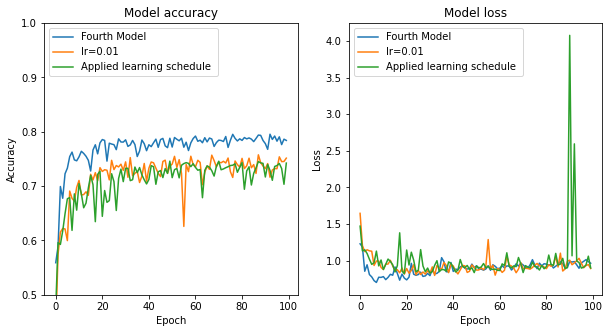

In [46]:
# Compare learning rate
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.plot(history7.history['val_accuracy']) #BatchNormalization+dropout
ax1.plot(history8.history['val_accuracy']) #lr=0.01
ax1.plot(history9.history['val_accuracy']) #learning schedule 
ax1.title.set_text('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylim([0.5,1])
ax1.legend(['Fourth Model', 'lr=0.01', 'Applied learning schedule '], loc='upper left')

ax2.plot(history7.history['val_loss']) #BatchNormalization+dropout
ax2.plot(history8.history['val_loss']) #lr=0.01
ax2.plot(history9.history['val_loss']) #learning schedule 
ax2.title.set_text('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Fourth Model', 'lr=0.01', 'Applied learning schedule '], loc='upper left')


plt.savefig('lr.png')
plt.show()

In [54]:
#Test10 4 hidden layers
model10 = models.Sequential()

#CNN with 3 hidden layers
model10.add(layers.Conv2D(32, (3, 3), activation='relu'))
model10.add(layers.BatchNormalization())
model10.add(layers.AveragePooling2D(2,2))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.BatchNormalization())
model10.add(layers.AveragePooling2D(2,2))
model10.add(layers.Conv2D(128, (3, 3), activation='relu'))
model10.add(layers.BatchNormalization())
model10.add(layers.AveragePooling2D(2,2))


#Classification
model10.add(layers.Flatten())
model10.add(layers.Dropout(0.3))
model10.add(layers.Dense(512, activation='relu'))
model10.add(layers.Dense(128, activation='relu'))
model10.add(layers.Dense(64, activation='relu'))
model10.add(layers.Dense(10, activation='softmax'))
model10.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history10 = model10.fit(train_images, train_labels, epochs=100, batch_size=32, shuffle=True,
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
model10.evaluate(test_images,  test_labels, verbose=1)

Epoch 1/100
1563/1563 [==============================] - 11s 6ms/step - loss: 1.6144 - accuracy: 0.4100 - val_loss: 1.1853 - val_accuracy: 0.5757
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0818 - accuracy: 0.6188 - val_loss: 1.0301 - val_accuracy: 0.6286
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9151 - accuracy: 0.6790 - val_loss: 0.9824 - val_accuracy: 0.6561
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8154 - accuracy: 0.7155 - val_loss: 0.8003 - val_accuracy: 0.7244
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7324 - accuracy: 0.7437 - val_loss: 0.7630 - val_accuracy: 0.7386
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6695 - accuracy: 0.7660 - val_loss: 0.8861 - val_accuracy: 0.7026
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6206 - accuracy: 0.7823 - val_loss: 0.7906 - val_a

[1.0523942708969116, 0.7736999988555908]

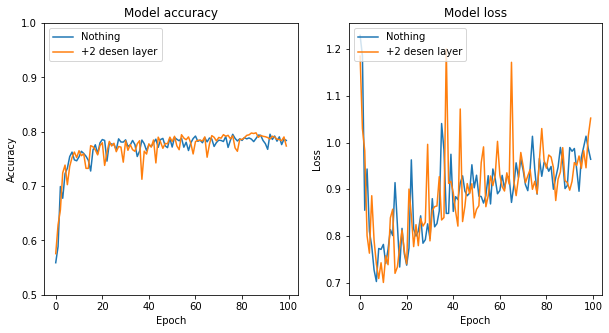

In [58]:
# Compare desen layer
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.plot(history7.history['val_accuracy']) #BatchNormalization+dropout
ax1.plot(history10.history['val_accuracy']) #+3 more desen layer
ax1.title.set_text('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylim([0.5,1])
ax1.legend(['Nothing', '+2 desen layer'], loc='upper left')

ax2.plot(history7.history['val_loss']) #BatchNormalization+dropout
ax2.plot(history10.history['val_loss']) #+3 more desen layer
ax2.title.set_text('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Nothing', '+2 desen layer'], loc='upper left')


plt.savefig('dense.png')
plt.show()